In [7]:
from scipy import io
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Датасет [WIDER FACES](http://shuoyang1213.me/WIDERFACE/)


In [10]:
path_mat = 'C:/Users/Fedor/Documents/Projects/BelkaFaces/WiredFaces/wider_face_train.mat'
path_images = 'C:/Users/Fedor/Documents/Projects/BelkaFaces/WiredFaces/WIDER_train/All'

In [11]:
mat = scipy.io.loadmat(path_mat)

### Список всех файлов

In [268]:
all_files = mat['file_list']

### Список всех координат лиц

In [299]:
all_boxes = mat['face_bbx_list']

## Пример изображений в датасете

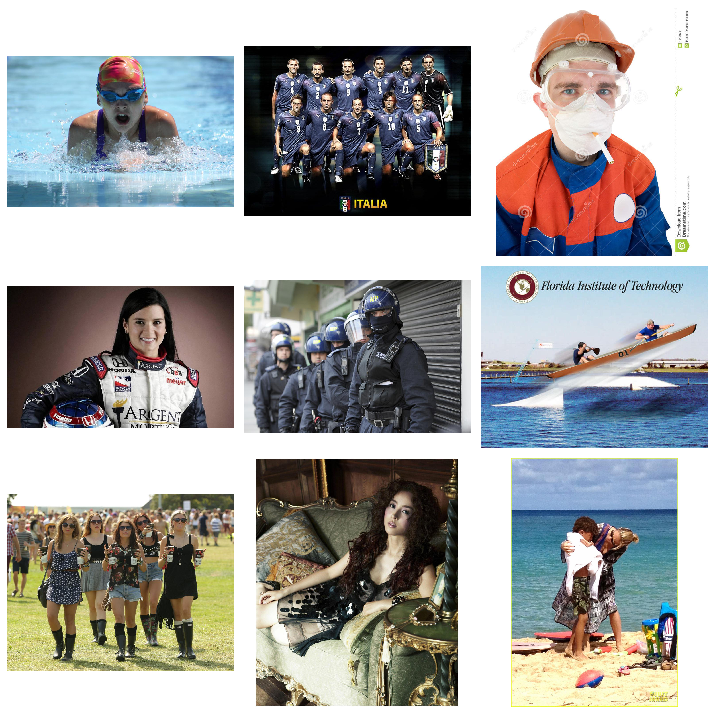

In [302]:
display_images(choose_random_images())

## Получим данные об изображениях в датасете

### Выберем рандомное изображение

In [325]:
random_image = choose_random_images(n=1)[0]
random_image

'40_Gymnastics_Gymnastics_40_578.jpg'

### Его номер в датасете 

In [326]:
folder, file = get_num_of_image(random_image)

Folder: 35 
File: 60


### Координаты лиц на изображении

In [327]:
boxes = get_boxes(folder, file)
boxes

array([[ 55, 214,  39,  38],
       [140, 251,  35,  40],
       [228, 274,  36,  40],
       [257, 237,  35,  38],
       [241, 192,  36,  42],
       [325, 278,  36,  42],
       [349, 222,  36,  38],
       [422, 281,  38,  43],
       [450, 232,  38,  45],
       [569, 221,  48,  48],
       [538, 285,  38,  48],
       [646, 290,  40,  45],
       [753, 153,  41,  48],
       [697, 222,  39,  49],
       [864, 166,  46,  54],
       [762, 297,  38,  43],
       [885, 310,  40,  48]])

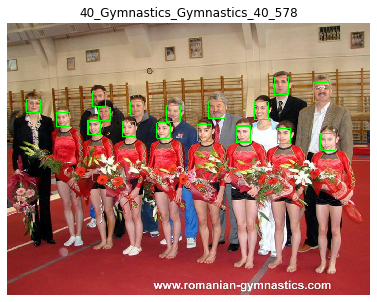

In [328]:
draw_rect(random_image, boxes)

## Helpers


In [309]:
def convert2RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [310]:
def choose_random_images(path=path_mat, n=10):
    images = []
    mat = scipy.io.loadmat(path)
    for _ in range(n):
        folder = random.choice(all_files)
        name = random.choice(folder[0])[0][0]
        images.append(name + ".jpg")
    return images

In [311]:
def get_num_of_image(name):
    folder_num = -1 
    file_num = -1
    for folder in all_files:
        folder_num += 1
        file_num = -1
        for file_name in folder[0]:
            file_num += 1
            name_ = file_name[0][0]
            if (name_ + '.jpg' == name):
                print("Folder: {0} \nFile: {1}".format(folder_num, file_num))
                return folder_num, file_num    

In [312]:
def get_boxes(folder, file):
    return all_boxes[folder][0][file][0]

In [313]:
def draw_rect(image, boxes):
    test_image = cv2.imread(path_images + '//' + image)
    img_copy = np.copy(test_image)
    
    for (x, y, w, h) in boxes:
        cv2.rectangle(img_copy,(x, y), (x+w, y+h), (0, 255, 0), 2)
        
    fig,ax = plt.subplots(1)
    fig.set_size_inches(9, 5)
    ax.set_title(image.split('.')[0])
    ax.imshow(convertToRGB(img_copy))
    plt.axis('off')
    plt.show()

In [314]:
def display_images(images):
    fig=plt.figure(figsize=(10, 10))
    columns = 3
    rows = 3
    for i in range(1, columns*rows +1):
        test_image = cv2.imread(path_images + '//' + images[i])
        img_copy = np.copy(test_image)
        
        fig.add_subplot(rows, columns, i)
        plt.imshow(convert2RGB(img_copy))
        plt.axis('off')
        plt.tight_layout(True)
    plt.show()
    

# Тестирование решений

**Как будем тестировать?** 

1. Выбираем рандомные n изображений из датасета
2. Получаем координаты всех лиц на всех изображениях 
3. Получаем результаты работы методов на этих изображениях, т.е. получаем координаты лиц
4. Сравниваем полученные результаты с реальными координатами 
5. Считаем среднюю ошибку по координатам. Сортируем методы по возрастанию ошибки
   1. Если метод не дал координат лица (не обнаружил лицо), то добавляем n-m нулевых векторов, где n - количество лиц на изображении, m - количество обнаруженных лиц.